In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
df= pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


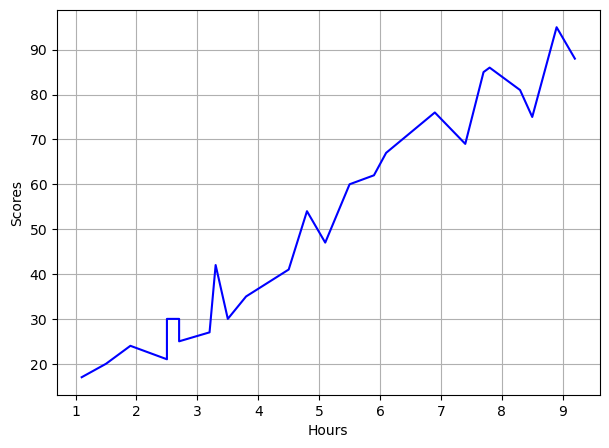

In [20]:
import matplotlib.pyplot as plt
sorted_df = df.sort_values('Hours')

plt.figure(figsize=(7, 5))
plt.plot(sorted_df['Hours'],
         sorted_df['Scores'],
         color='blue')


plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

In [21]:
missing=df.isnull().sum()
print(missing)

Hours     0
Scores    0
dtype: int64


In [22]:
X= df.iloc[:,0].values
y=df.iloc[:,1].values
print(X.shape)
print(y.shape)

(25,)
(25,)


In [23]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
print(X.shape)

(25, 1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)


In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred=lin_reg.predict(X_train)
from sklearn.metrics import r2_score
Er1=r2_score(y_train,y_pred)
print('R squared of Linear Regression :', Er1)

R squared of Linear Regression : 0.9515510725211552


In [27]:
from sklearn.metrics import r2_score
Er1=r2_score(y_test,lin_reg.predict(X_test))
print('R squared of Linear Regression :', Er1)

R squared of Linear Regression : 0.9454906892105354


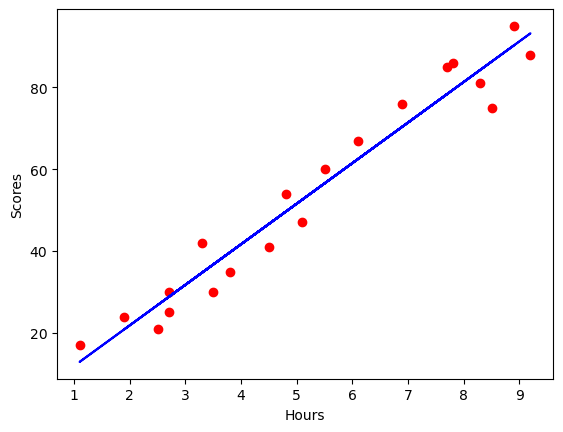

In [28]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


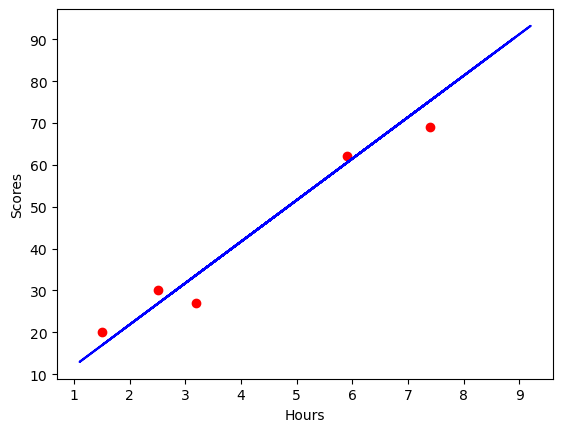

In [29]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=10)

X_poly = poly_reg.fit_transform(X_train)

lin_reg_2 = LinearRegression().fit(X_poly, y_train)


In [31]:
from sklearn.metrics import r2_score
Er2=r2_score(y_train,lin_reg_2.predict(X_poly))
print('R squared of Polynomial Regression :', Er2)

R squared of Polynomial Regression : 0.9839268937805358


In [32]:
from sklearn.metrics import r2_score
x_testpoly=poly_reg.fit_transform(X_test)
Er2=r2_score(y_test,lin_reg_2.predict(poly_reg.fit_transform(X_test)))
print('R squared of Polynomial Regression :', Er2)


R squared of Polynomial Regression : 0.011055360095443167


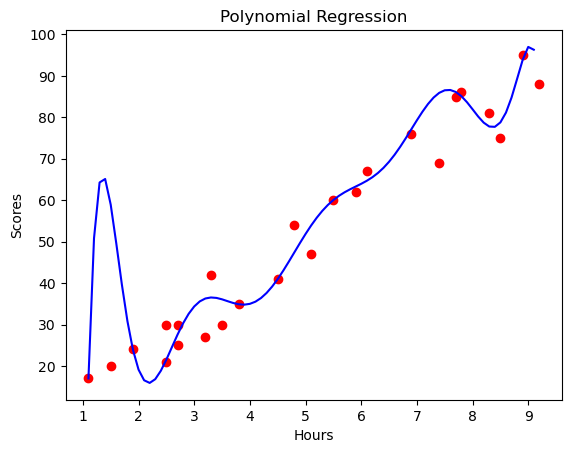

In [33]:
X_grid = np.arange(X.min(), X.max(), 0.1)
X_grid = X_grid.reshape(-1, 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

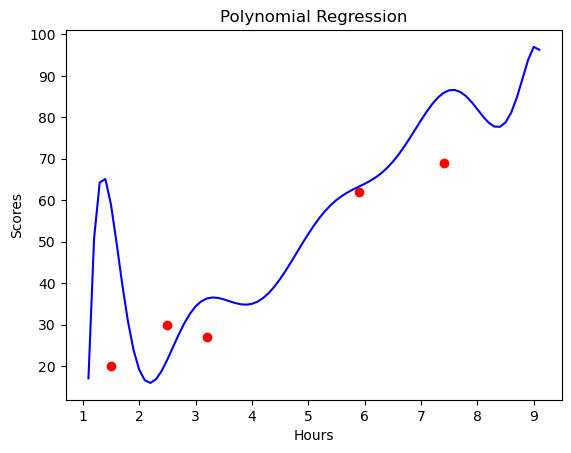

In [34]:
X_grid = np.arange(X.min(), X.max(), 0.1)
X_grid = X_grid.reshape(-1, 1)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()